In [1]:
import sys
import os

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib.pyplot import figure
from tabulate import tabulate


### Upload Data

In [4]:

os.chdir(sys.path[3])
data_general = pd.read_csv(r'data/process/new_data.csv', skiprows=[1, 2]).reset_index()


## Data by:
1. California
2. Alberta
3. Washington

In [5]:
data_states = pd.read_csv(r'data/process/res_stolen_loc_splitted.csv', skiprows=[1, 2]).reset_index()

In [6]:
cols = ['Total','California','Alberta','Washington','other']
per_cols = ['per_'+ col for col in cols[:-1]]
per_cols_by_ans = ['per_2_'+ col for col in cols[1:]]
colors =['red','blue','green','orange']

In [7]:
def count_per_city_question_var(my_data: DataFrame, old_name: str, new_name: str, is_state: str, per_name_def:str):
    # For total work with all data anf for state work only with the state in @is_state
    # Select only the data of question name (@old_name)
    if is_state == 'Total':
        rel_demographic = DataFrame(my_data[old_name])
    else:
        rel_demographic = DataFrame(my_data[my_data['state'] == is_state][old_name])
    # Rearrange data
    rel_demographic = rel_demographic.rename(columns={old_name: new_name})
    rel_demographic = rel_demographic[rel_demographic[new_name].notna()].reset_index()

    # calculate absolute and relative count for each veritable
    sum_temp = rel_demographic.groupby(by=[new_name]).count().rename(columns={'index': is_state})
    sum_temp[per_name_def] = sum_temp[is_state] / sum_temp[is_state].sum() * 100
    return sum_temp

## All the demographic parameters

In [8]:
data_store= []
# The coe run over each tuple
for pair in {'Q2':'part','Q4':'year','Q5':'month','Q6':'day_time','Q7':'is_locked','Q8':'locked_type','Q9':'theft_location','Q10':'is_regi','Q11':'report_loc','Q12':'is_insured','Q14':'is_electric','Q15':'bike_type','Q17':'is_university','Q19':'is_online','Q21':'is_police_assist','Q23':'recovery_loc','Q24':'con_recovery','Q34': 'birth', 'Q35': 'gender', 'Q36': 'income', 'Q38': 'education', 'Q39': 'ethnic_origin'}.items():
    print(pair)
    # Get the question number and its new name
    question_number = pair[0]
    per_name = pair[1]
    # count stat per state/total and question_number
    sumy = count_per_city_question_var(data_general, old_name=question_number, new_name=per_name, is_state=cols[0],per_name_def=per_cols[0])
    for i,name in enumerate(cols[1:-1]):
        temp_per_name = per_cols[i+1]
        sumy[[name, temp_per_name]] = count_per_city_question_var(data_states, old_name=question_number,
                                                                  new_name=per_name,
                                                                  is_state=name, per_name_def=temp_per_name)
    if per_name == 'birth':
        sumy.index = sumy.index.astype('int32')
    # add the new data to datastore which will present latter
    data_store.append(sumy.fillna(0).astype('int32'))

('Q2', 'part')
('Q4', 'year')
('Q5', 'month')
('Q6', 'day_time')
('Q7', 'is_locked')
('Q8', 'locked_type')
('Q9', 'theft_location')
('Q10', 'is_regi')
('Q11', 'report_loc')
('Q12', 'is_insured')
('Q14', 'is_electric')
('Q15', 'bike_type')
('Q17', 'is_university')
('Q19', 'is_online')
('Q21', 'is_police_assist')
('Q23', 'recovery_loc')
('Q24', 'con_recovery')
('Q34', 'birth')
('Q35', 'gender')
('Q36', 'income')
('Q38', 'education')
('Q39', 'ethnic_origin')


In [9]:
## It combines two real and percentage values into one column
def prep_for_export(test):
    real = test[cols[1:]].apply(lambda x: str(int(x))).reset_index(drop=True)
    per = test[per_cols_by_ans].apply(lambda x: ' ('  + str(int(round(x,0))) + '%' + ')').reset_index(drop=True)
    return real + per


part
those are not include in the results presentation since less than 479.25 tolerance  ['A major bicycle part necessary for riding (i.e., saddle, wheel, pedal, or handlebar)']


,California,Alberta,Washington,other
part,,,,
"Entire bicycle (i.e., frame and components)",696 (37%),233 (12%),153 (8%),807 (43%)


<AxesSubplot:xlabel='part'>

year
those are not include in the results presentation since less than 110.5 tolerance  ['2017' '2018' 'Don’t know/not sure']


,California,Alberta,Washington,other
year,,,,
2019,82 (31%),32 (12%),37 (14%),111 (42%)
2020,138 (42%),39 (12%),25 (8%),123 (38%)
2021,268 (39%),69 (10%),55 (8%),303 (44%)
2022,85 (53%),21 (13%),7 (4%),46 (29%)


<AxesSubplot:xlabel='year'>

for California (53.46) : 2022 is outlier (new_mean:37.44, new_std:5.67)
for Alberta (9.93) : 2021 is outlier (new_mean:12.47, new_std:0.64)
for Washington (14.12) : 2019 is outlier (new_mean:6.67, new_std:1.97)
for other (28.93) : 2022 is outlier (new_mean:41.27, new_std:3.03)
month
those are not include in the results presentation since less than 71.65384615384616 tolerance  []


,California,Alberta,Washington,other
month,,,,
April,59 (36%),27 (17%),12 (7%),65 (40%)
August,46 (32%),23 (16%),11 (8%),65 (45%)
December,53 (62%),6 (7%),6 (7%),20 (24%)
Don’t know/not sure,59 (45%),14 (11%),9 (7%),49 (37%)
February,51 (58%),7 (8%),5 (6%),25 (28%)
January,49 (51%),13 (13%),5 (5%),30 (31%)
July,42 (31%),18 (13%),14 (10%),63 (46%)
June,75 (27%),51 (18%),29 (10%),126 (45%)
March,60 (52%),9 (8%),5 (4%),42 (36%)


<AxesSubplot:xlabel='month'>

day_time
those are not include in the results presentation since less than 185.5 tolerance  ['Morning (06:00-11:59)']


,California,Alberta,Washington,other
day_time,,,,
Afternoon (12:00-17:59),132 (36%),55 (15%),32 (9%),143 (40%)
Don’t know/not sure,115 (34%),28 (8%),30 (9%),164 (49%)
Evening (18:00-23:59),103 (45%),16 (7%),14 (6%),94 (41%)
Overnight (00:00-05:59),295 (39%),107 (14%),64 (8%),287 (38%)


<AxesSubplot:xlabel='day_time'>

for California (45.37) : Evening (18:00-23:59) is outlier (new_mean:36.59, new_std:2.53)
for Washington (6.17) : Evening (18:00-23:59) is outlier (new_mean:8.75, new_std:0.22)
for other (48.66) : Don’t know/not sure is outlier (new_mean:39.68, new_std:1.65)
is_locked
those are not include in the results presentation since less than 232.25 tolerance  ['Don’t know/not sure'
 'Yes, locked one or more wheels (i.e., bike locked to itself) ']


,California,Alberta,Washington,other
is_locked,,,,
"No, unlocked",269 (37%),100 (14%),75 (10%),284 (39%)
"Yes, frame locked to a fixed structure (e.g., bike rack)",374 (39%),115 (12%),67 (7%),411 (43%)


<AxesSubplot:xlabel='is_locked'>

locked_type
those are not include in the results presentation since less than 9.589285714285714 tolerance  ['Cable lock ,Don’t know/not sure'
 'Cable lock ,Frame lock (aka wheel lock/O-lock/ring lock) '
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Cable lock '
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Cable lock ,Other (please specify):'
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Chain-lock with padlock '
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Chain-lock with padlock ,Cable lock '
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Folding lock '
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Frame lock (aka wheel lock/O-lock/ring lock) '
 'Chain-lock combination (chain with mini u-lock or integrated locking mechanism),Other (please specify):'
 'Chain-lock with padl

,California,Alberta,Washington,other
locked_type,,,,
Cable lock,138 (38%),53 (14%),23 (6%),154 (42%)
"Cable lock ,Other (please specify):",7 (44%),0 (0%),3 (19%),6 (38%)
Chain-lock combination (chain with mini u-lock or integrated locking mechanism),33 (40%),17 (20%),3 (4%),30 (36%)
Chain-lock with padlock,17 (35%),5 (10%),3 (6%),24 (49%)
Folding lock,7 (29%),1 (4%),5 (21%),11 (46%)
Other (please specify):,23 (32%),13 (18%),6 (8%),29 (41%)
Two U-Locks,7 (50%),3 (21%),2 (14%),2 (14%)
​U-lock,124 (45%),17 (6%),21 (8%),114 (41%)
"​U-lock ,Cable lock",23 (45%),4 (8%),3 (6%),21 (41%)


<AxesSubplot:xlabel='locked_type'>

for other (14.29) : Two U-Locks  is outlier (new_mean:42.91, new_std:4.57)
theft_location
those are not include in the results presentation since less than 83.54545454545455 tolerance  ['Against a street sign, tree, or street furniture (e.g., lamppost, railing, bench, parking meter) '
 'Building lobby ' 'Condo storage room ' 'Inside house/apartment '
 'Workplace office ']


,California,Alberta,Washington,other
theft_location,,,,
Controlled-access bicycle room or enclosed bike locker,31 (32%),13 (13%),15 (15%),39 (40%)
Inside a shed/garage,208 (40%),89 (17%),46 (9%),177 (34%)
Other (please specify):,116 (43%),25 (9%),23 (8%),107 (39%)
Outdoor bike rack,130 (40%),41 (13%),15 (5%),139 (43%)
"Outside in the yard or on a balcony, porch, or patio",86 (33%),26 (10%),20 (8%),128 (49%)
Parking garage bike rack/railing/pipe/etc.,62 (42%),16 (11%),15 (10%),54 (37%)


<AxesSubplot:xlabel='theft_location'>

for Alberta (17.12) : Inside a shed/garage  is outlier (new_mean:11.2, new_std:1.71)
for Washington (15.31) : Controlled-access bicycle room or enclosed bike locker  is outlier (new_mean:7.97, new_std:2.08)
for other (49.23) : Outside in the yard or on a balcony, porch, or patio  is outlier (new_mean:38.56, new_std:3.31)
is_regi
those are not include in the results presentation since less than 306.3333333333333 tolerance  ['Don’t know/not sure']


,California,Alberta,Washington,other
is_regi,,,,
No,443 (39%),140 (12%),82 (7%),470 (41%)
Yes,235 (37%),92 (14%),71 (11%),243 (38%)


<AxesSubplot:xlabel='is_regi'>

report_loc
those are not include in the results presentation since less than 61.266666666666666 tolerance  ['A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Other (please specify):'
 'A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter)'
 'A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter),Other (please specify):'
 'I did not report the theft' 'Other (please specify):'
 'Social media (e.g. Instagram, Twitter)'
 'The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Other (please specify):'
 'The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter),Other (please specify):'
 'The police ,Other (please specify):'
 'The police ,Social media (e.g. Instagram, Twitter)'
 'The

,California,Alberta,Washington,other
report_loc,,,,
"A bicycle registry/recovery system (e.g., Bike Index, a university registration program)",46 (46%),16 (16%),7 (7%),30 (30%)
The police,125 (40%),33 (11%),20 (6%),133 (43%)
"The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program)",227 (42%),75 (14%),48 (9%),188 (35%)
"The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter)",203 (33%),85 (14%),59 (9%),275 (44%)


<AxesSubplot:xlabel='report_loc'>

for California (32.64) : The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter) is outlier (new_mean:42.95, new_std:3.2)
for Alberta (10.61) : The police  is outlier (new_mean:14.59, new_std:1.37)
is_insured
those are not include in the results presentation since less than 229.625 tolerance  ['Don’t know/not sure ' 'I prefer to not answer']


,California,Alberta,Washington,other
is_insured,,,,
No,418 (38%),137 (13%),76 (7%),463 (42%)
Yes,260 (40%),84 (13%),73 (11%),234 (36%)


<AxesSubplot:xlabel='is_insured'>

is_electric
those are not include in the results presentation since less than 299.5 tolerance  ['Yes, with pedal-assist (motor activates only while pedalling) '
 'Yes, with pedal-assist and throttle (motor activates while pedalling or by throttle-only)']


,California,Alberta,Washington,other
is_electric,,,,
​No,584 (37%),217 (14%),120 (8%),653 (41%)


<AxesSubplot:xlabel='is_electric'>

bike_type
those are not include in the results presentation since less than 69.15384615384616 tolerance  ['BMX ' 'Cruiser ' 'Delivery/Cargo' 'Don’t know/not sure' 'Fixed gear'
 'Folding  ' 'Recumbent ' 'Tandem ' 'Tricycle or quadricycle']


,California,Alberta,Washington,other
bike_type,,,,
Gravel/cyclocross,40 (36%),10 (9%),9 (8%),52 (47%)
Hybrid/City/Dutch,204 (37%),54 (10%),47 (9%),243 (44%)
Mountain,157 (29%),128 (23%),43 (8%),220 (40%)
Road,191 (51%),20 (5%),37 (10%),130 (34%)


<AxesSubplot:xlabel='bike_type'>

for California (50.53) : Road is outlier (new_mean:33.97, new_std:4.65)
for Alberta (23.36) : Mountain   is outlier (new_mean:8.05, new_std:2.43)
for Washington (9.79) : Road is outlier (new_mean:8.18, new_std:0.37)
for other (34.39) : Road is outlier (new_mean:43.78, new_std:3.39)
is_university
those are not include in the results presentation since less than 456.0 tolerance  ['Yes']


,California,Alberta,Washington,other
is_university,,,,
No,616 (39%),215 (14%),140 (9%),606 (38%)


<AxesSubplot:xlabel='is_university'>

is_online
those are not include in the results presentation since less than 20.071428571428573 tolerance  ['Yes, on Craigslist ' 'Yes, on Kijiji ' 'Yes, on OfferUp '
 'Yes, on other website (please specify):']


,California,Alberta,Washington,other
is_online,,,,
Don’t know/not sure,10 (27%),7 (19%),4 (11%),16 (43%)
"Yes, on Facebook Marketplace",5 (22%),5 (22%),2 (9%),11 (48%)
​No,33 (20%),40 (24%),21 (13%),73 (44%)


<AxesSubplot:xlabel='is_online'>

for California (27.03) : Don’t know/not sure is outlier (new_mean:20.75, new_std:1.4)
for Alberta (18.92) : Don’t know/not sure is outlier (new_mean:22.85, new_std:1.56)
for other (47.83) : Yes, on Facebook Marketplace  is outlier (new_mean:43.48, new_std:0.33)
is_police_assist
those are not include in the results presentation since less than 46.833333333333336 tolerance  []


,California,Alberta,Washington,other
is_police_assist,,,,
"Yes, in-person support",23 (21%),32 (29%),10 (9%),45 (41%)
"Yes, phone or email support",11 (16%),20 (29%),8 (12%),29 (43%)
​No,30 (29%),9 (9%),21 (20%),43 (42%)


<AxesSubplot:xlabel='is_police_assist'>

for California (29.13) : ​No  is outlier (new_mean:18.54, new_std:3.35)
for Alberta (8.74) : ​No  is outlier (new_mean:29.25, new_std:0.23)
for Washington (20.39) : ​No  is outlier (new_mean:10.43, new_std:1.89)
recovery_loc
those are not include in the results presentation since less than 10.035714285714286 tolerance  ['Community centre/church ' 'Hospital/government building '
 'Industry or factory ' 'Parking garage' 'Stadium/sports facility '
 'Transit rail station/bus stop ' 'University/college ']


,California,Alberta,Washington,other
recovery_loc,,,,
Don’t know/not sure,9 (27%),10 (30%),4 (12%),10 (30%)
Downtown business/office/shopping district,4 (18%),4 (18%),5 (23%),9 (41%)
Local business/office/shopping district,7 (18%),5 (13%),9 (24%),17 (45%)
Other (please specify):,13 (30%),6 (14%),9 (20%),16 (36%)
Park/playing field/golf course/empty lot/green space,2 (14%),3 (21%),3 (21%),6 (43%)
"Residential zone (e.g., house, townhouse, apartment suite)",20 (20%),25 (25%),8 (8%),48 (48%)
Shopping mall,5 (45%),3 (27%),0 (0%),3 (27%)


<AxesSubplot:xlabel='recovery_loc'>

for California (45.45) : Shopping mall  is outlier (new_mean:21.25, new_std:5.88)
for Washington (0.0) : Shopping mall  is outlier (new_mean:18.06, new_std:6.46)
con_recovery
those are not include in the results presentation since less than 14.875 tolerance  ['Don’t know/not sure'
 'Salvage/junk– bicycle was not rideable or repairable']


,California,Alberta,Washington,other
con_recovery,,,,
Repairable– bicycle was damaged and repairs were required before being rideable,13 (29%),10 (22%),6 (13%),16 (36%)
Rideable– bicycle was safe to operate and immediately usable,13 (21%),13 (21%),5 (8%),32 (51%)


<AxesSubplot:xlabel='con_recovery'>

birth
those are not include in the results presentation since less than 11.694444444444445 tolerance  [1935 1938 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1960 1961 2003 2004 2005 2006 2007 2008 2009 2010 2012 2013]


,California,Alberta,Washington,other
birth,,,,
1955,6 (43%),5 (36%),2 (14%),1 (7%)
1956,5 (33%),3 (20%),1 (7%),6 (40%)
1957,3 (21%),3 (21%),0 (0%),8 (57%)
1958,5 (38%),3 (23%),0 (0%),5 (38%)
1959,10 (48%),0 (0%),2 (10%),9 (43%)
1962,14 (61%),4 (17%),0 (0%),5 (22%)
1963,8 (44%),4 (22%),2 (11%),4 (22%)
1964,7 (50%),2 (14%),1 (7%),4 (29%)
1965,7 (30%),3 (13%),3 (13%),10 (43%)


<AxesSubplot:xlabel='birth'>

for California (4.76) : 1999 is outlier (new_mean:38.94, new_std:9.48)
for Alberta (35.71) : 1955 is outlier (new_mean:12.52, new_std:6.95)
for Washington (28.57) : 1999 is outlier (new_mean:7.73, new_std:5.28)
for other (7.14) : 1955 is outlier (new_mean:41.35, new_std:10.25)
gender
those are not include in the results presentation since less than 216.25 tolerance  ['Non-binary / third gender' 'Prefer not to say']


,California,Alberta,Washington,other
gender,,,,
Man,440 (42%),123 (12%),89 (8%),408 (38%)
Woman,213 (35%),89 (14%),51 (8%),261 (43%)


<AxesSubplot:xlabel='gender'>

income
those are not include in the results presentation since less than 86.35 tolerance  ['Don’t know/not sure' 'Under $20,000 per year']


,California,Alberta,Washington,other
income,,,,
"$200,000 or more per year",195 (54%),26 (7%),30 (8%),111 (31%)
"Between $100,000 and $149,999 per year",97 (36%),39 (14%),29 (11%),107 (39%)
"Between $150,000 and $199,999 per year",74 (43%),18 (10%),18 (10%),64 (37%)
"Between $20,000 and $34,999 per year",32 (29%),15 (14%),4 (4%),60 (54%)
"Between $35,000 and $49,999 per year",23 (24%),11 (12%),11 (12%),49 (52%)
"Between $50,000 and $74,999 per year",73 (33%),28 (13%),19 (9%),103 (46%)
"Between $75,000 and $99,999 per year",75 (32%),44 (19%),20 (9%),92 (40%)
I prefer to not answer,62 (39%),30 (19%),9 (6%),59 (37%)


<AxesSubplot:xlabel='income'>

for California (53.87) : $200,000 or more per year is outlier (new_mean:33.63, new_std:6.04)
for Washington (3.6) : Between $20,000 and $34,999 per year is outlier (new_mean:9.11, new_std:2.0)
education
those are not include in the results presentation since less than 123.64285714285714 tolerance  ['Associate’s/vocational/technical\u202fdegree (2- or 3-year degree, trades certificate) \u202f \u202f \u202f \u202f \u202f \u202f \u202f \t '
 'Graduated high school (i.e., High school diploma)\u202f \u202f \u202f \u202f \t '
 'I prefer to not answer'
 'Some high school or less\u202f \u202f \u202f \u202f \u202f \u202f \u202f \u202f \u202f \u202f \u202f \t ']


,California,Alberta,Washington,other
education,,,,
Bachelor’s degree (university 4-year degree) \t,257 (38%),80 (12%),65 (10%),270 (40%)
"Graduate degree (e.g., Master’s, Professional degree, Doctorate)",299 (42%),58 (8%),64 (9%),293 (41%)
Some university (no degree),44 (35%),17 (14%),10 (8%),53 (43%)


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='education'>

for California (41.88) : Graduate degree (e.g., Master’s, Professional degree, Doctorate)  is outlier (new_mean:36.86, new_std:1.95)
for Alberta (8.12) : Graduate degree (e.g., Master’s, Professional degree, Doctorate)  is outlier (new_mean:12.81, new_std:1.28)
for Washington (8.06) : Some university (no degree)  is outlier (new_mean:9.32, new_std:0.5)
for other (42.74) : Some university (no degree)  is outlier (new_mean:40.61, new_std:0.61)
ethnic_origin
those are not include in the results presentation since less than 71.66666666666667 tolerance  ['African (e.g., Moroccan, Ghanaian, South African, etc.) '
 'Caribbean (e.g., Cuban, Jamaican, Bajan, etc.) '
 'Central/South American (e.g., Mexican, Salvadorian, Argentinian, etc.) '
 'Indigenous (First Nations, Metis, Inuk/Inuit, etc.)'
 'Middle Eastern (e.g., Lebanese, Iranian, Syrian, etc.) '
 'Oceanian (e.g., Australian, New Zealander, etc.) '
 'Other (please specify):'
 'South Asian (e.g., Punjabi, Indian, Pakistani, etc.) ']


C:\Users\Achituv\AppData\Local\Temp\ipykernel_20644\3841799267.py:28: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('python/notebooks/per_state/figs/'+q_name+'.png')


,California,Alberta,Washington,other
ethnic_origin,,,,
"Asian (e.g., Chinese, Filipino, Korean, etc.)",50 (60%),9 (11%),3 (4%),22 (26%)
"European (e.g., British Isles, German, French, Greek, Italian, etc.)",459 (36%),170 (13%),124 (10%),518 (41%)
I prefer to not answer,29 (37%),15 (19%),3 (4%),31 (40%)
Multi-ethnic (2+ ethnic groups),47 (47%),5 (5%),8 (8%),39 (39%)


<AxesSubplot:xlabel='ethnic_origin'>

for California (59.52) : Asian (e.g., Chinese, Filipino, Korean, etc.)  is outlier (new_mean:40.26, new_std:6.27)
for other (26.19) : Asian (e.g., Chinese, Filipino, Korean, etc.)  is outlier (new_mean:39.96, new_std:0.71)


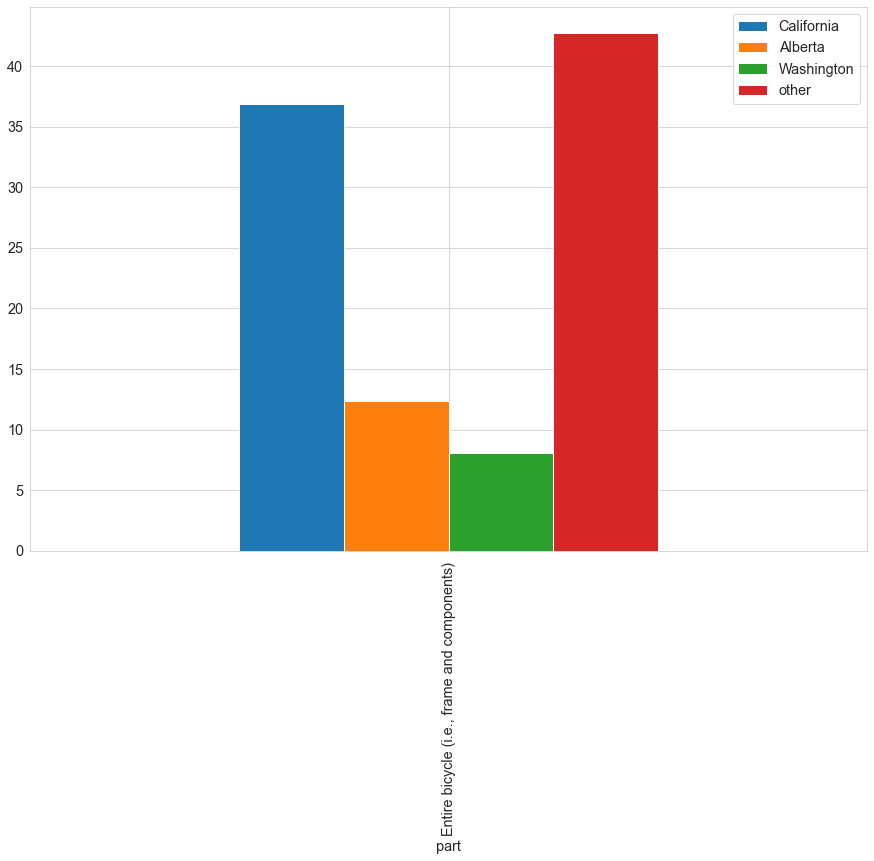

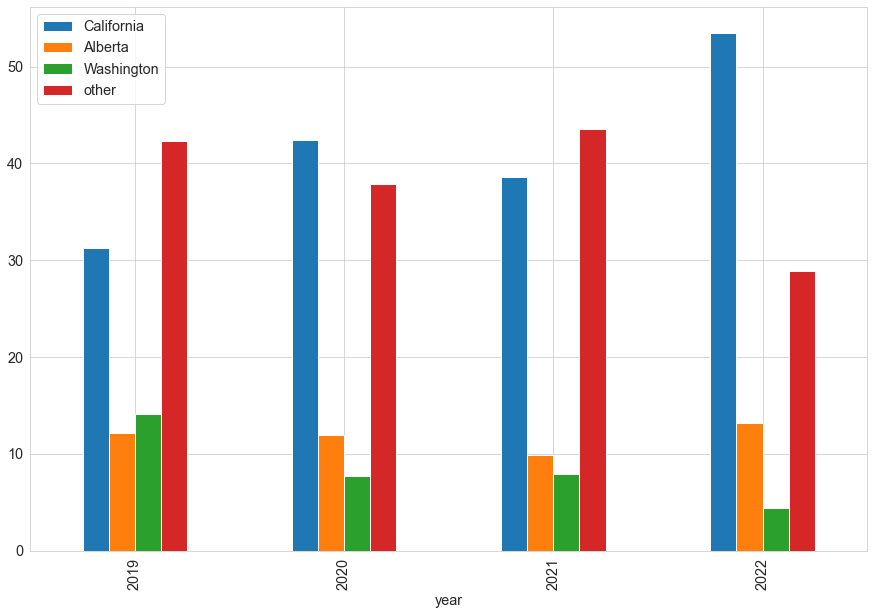

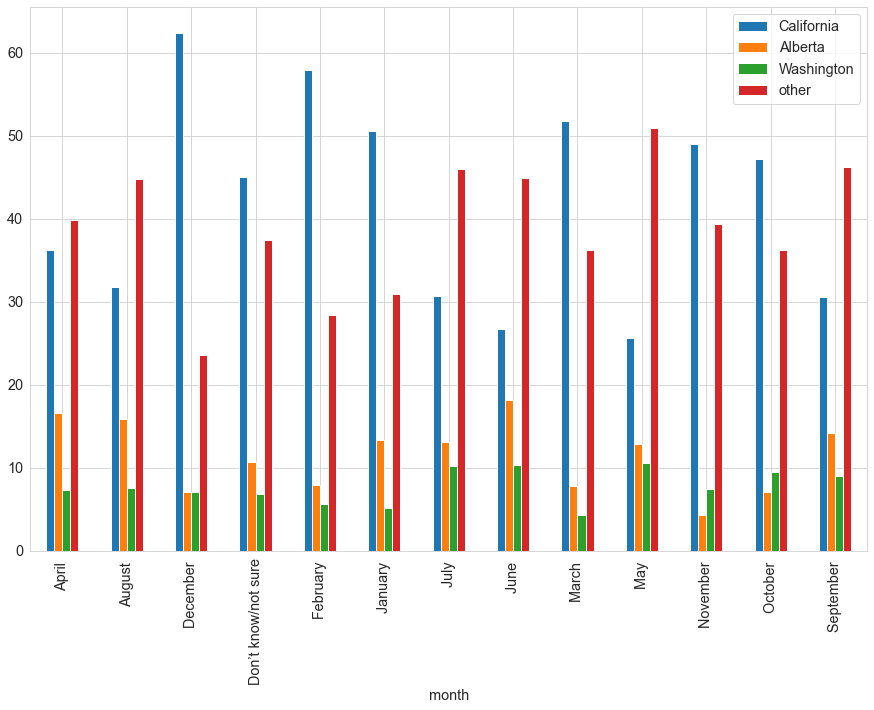

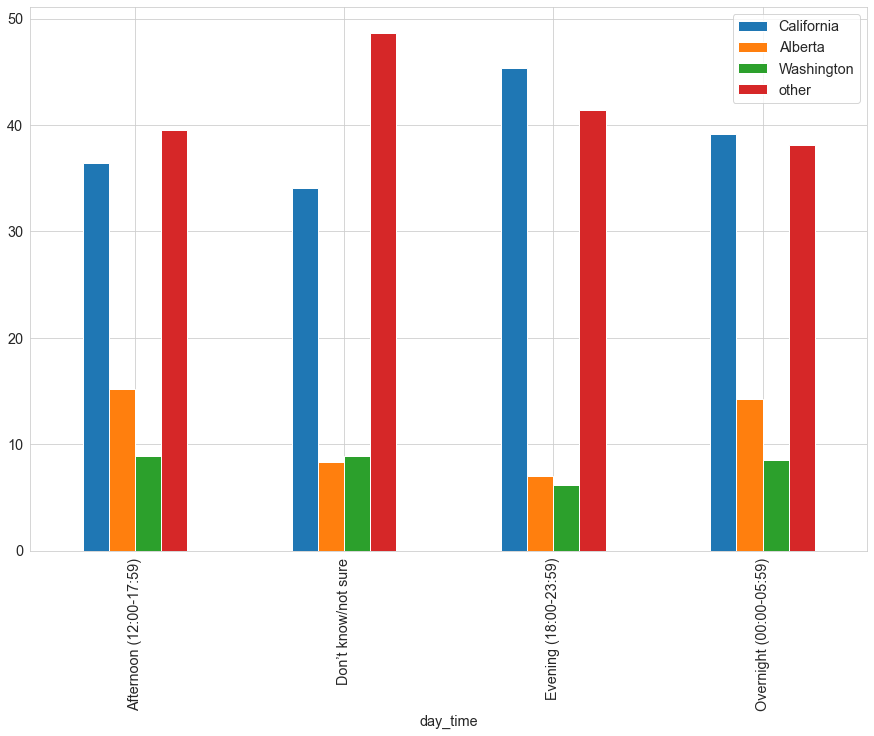

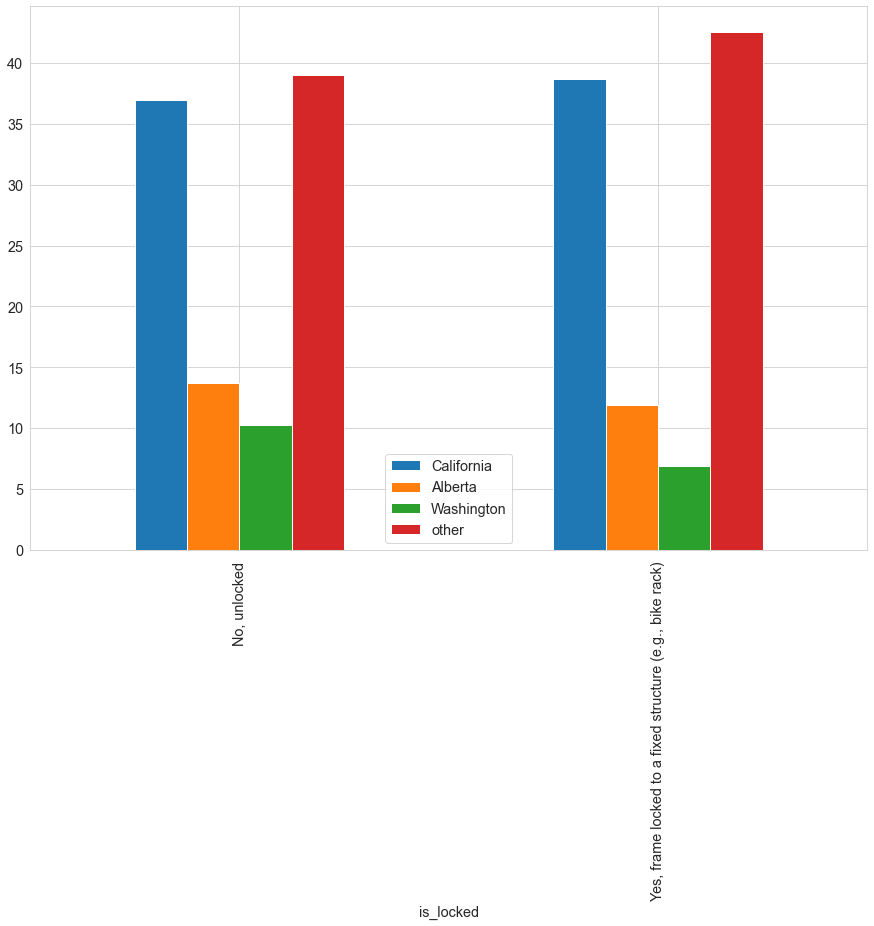

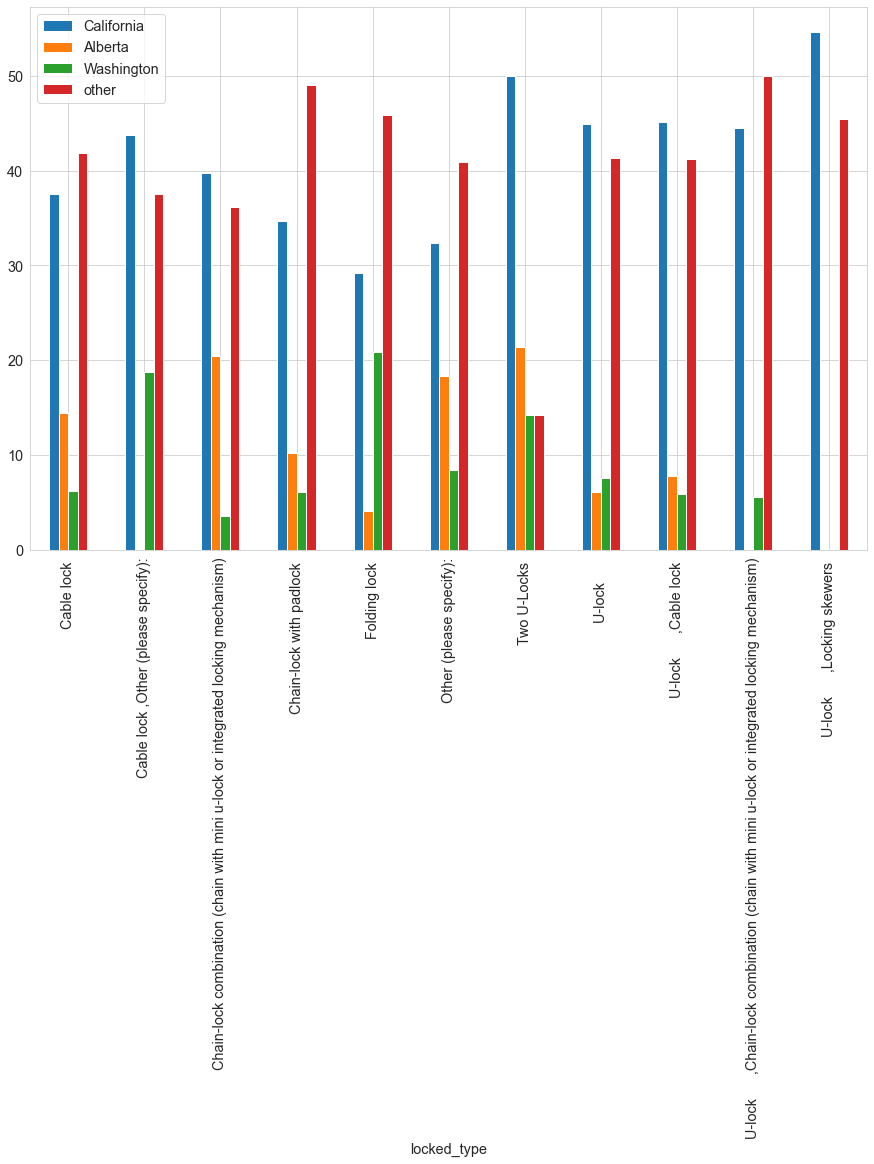

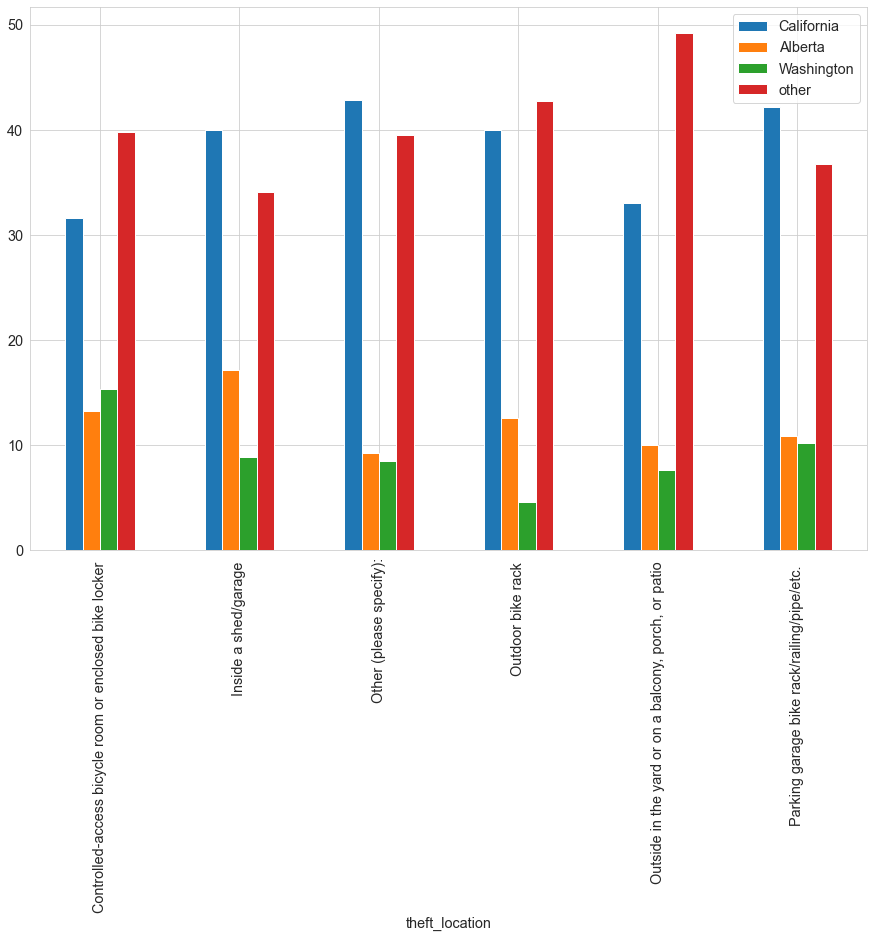

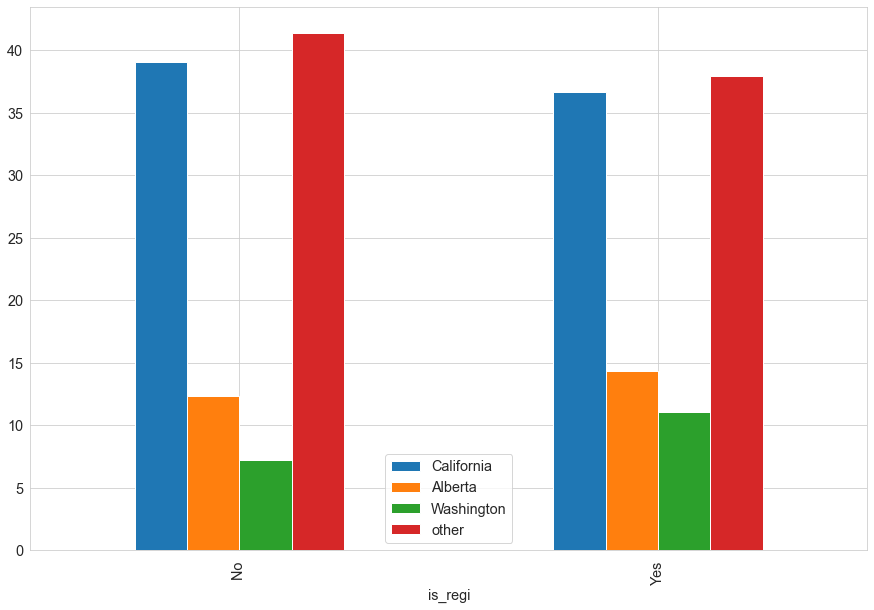

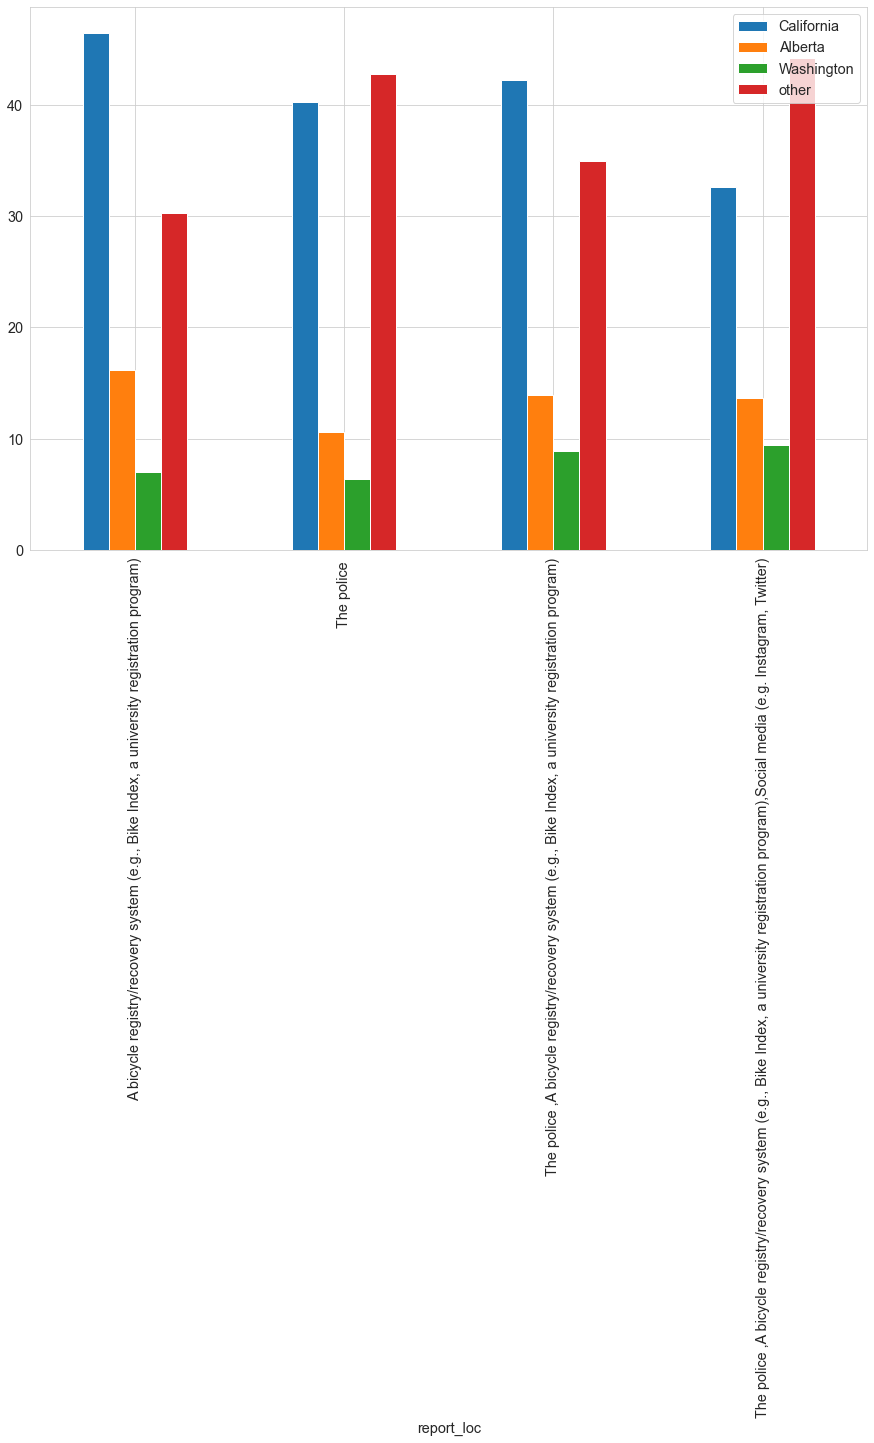

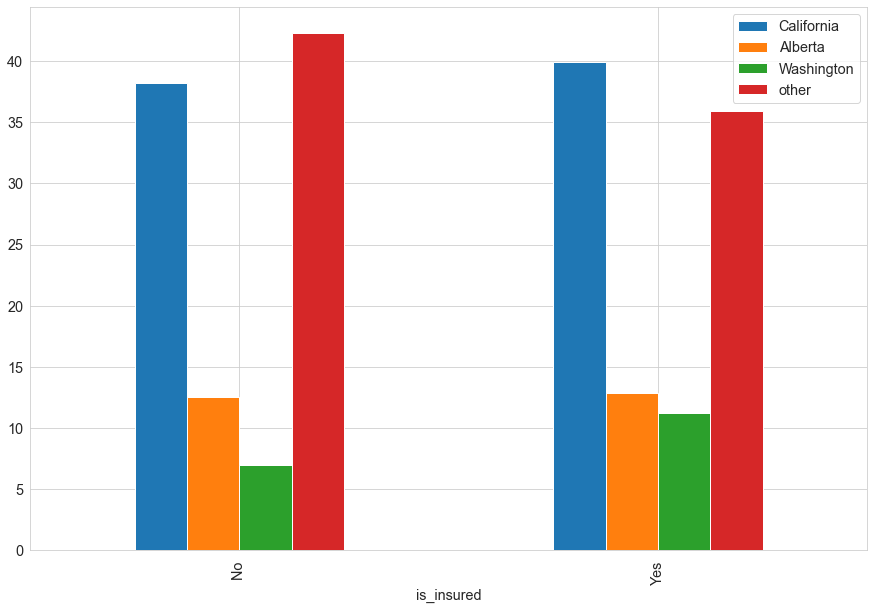

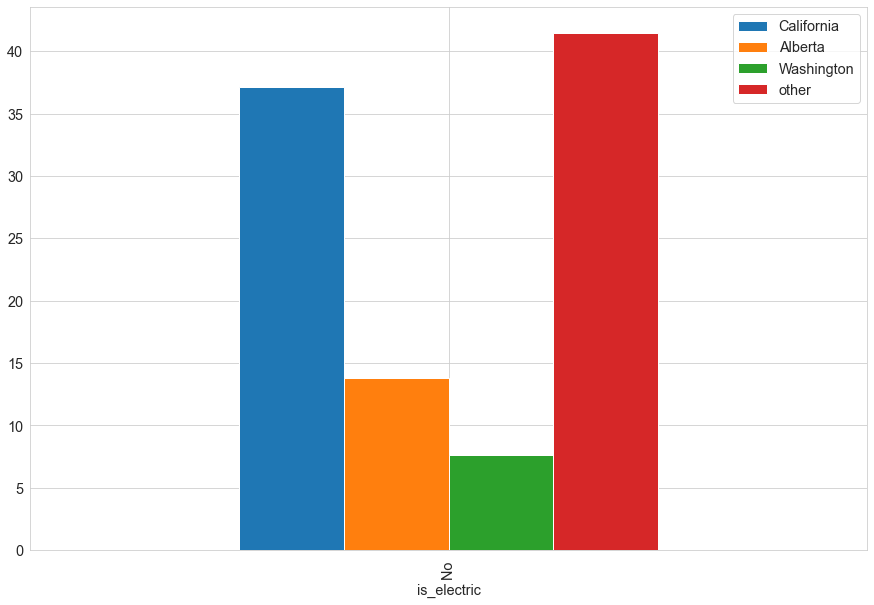

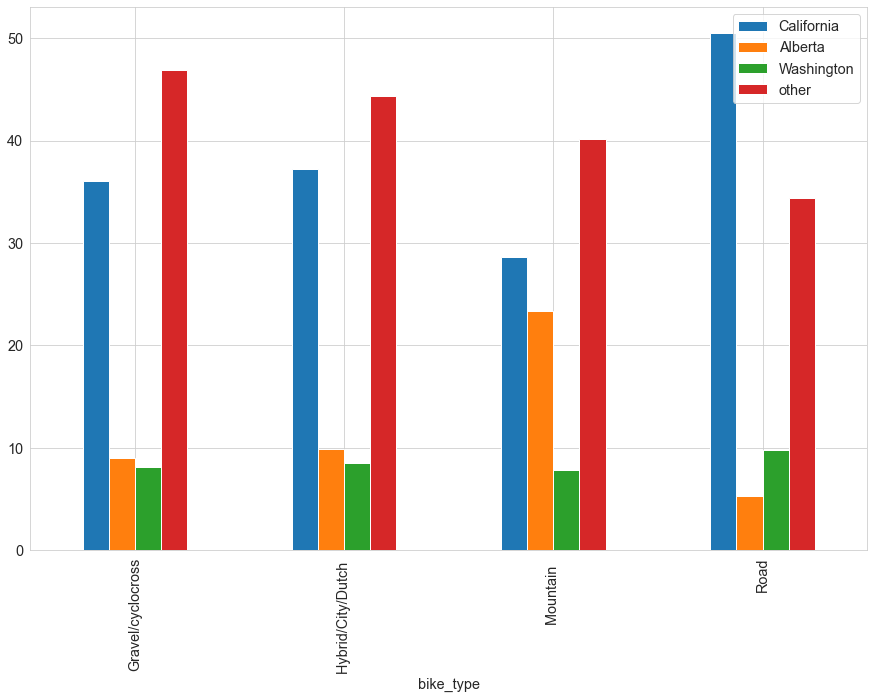

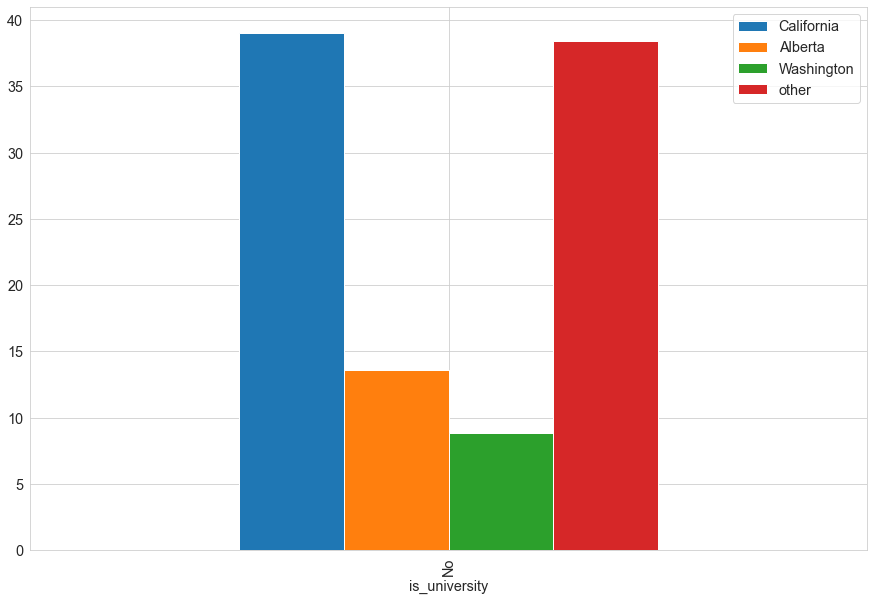

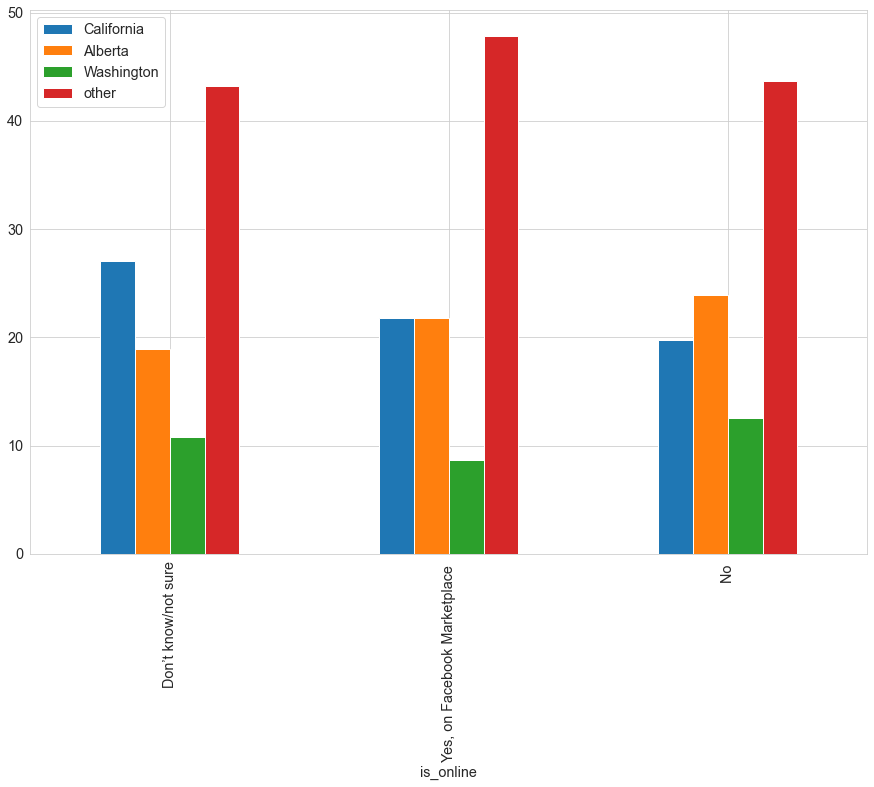

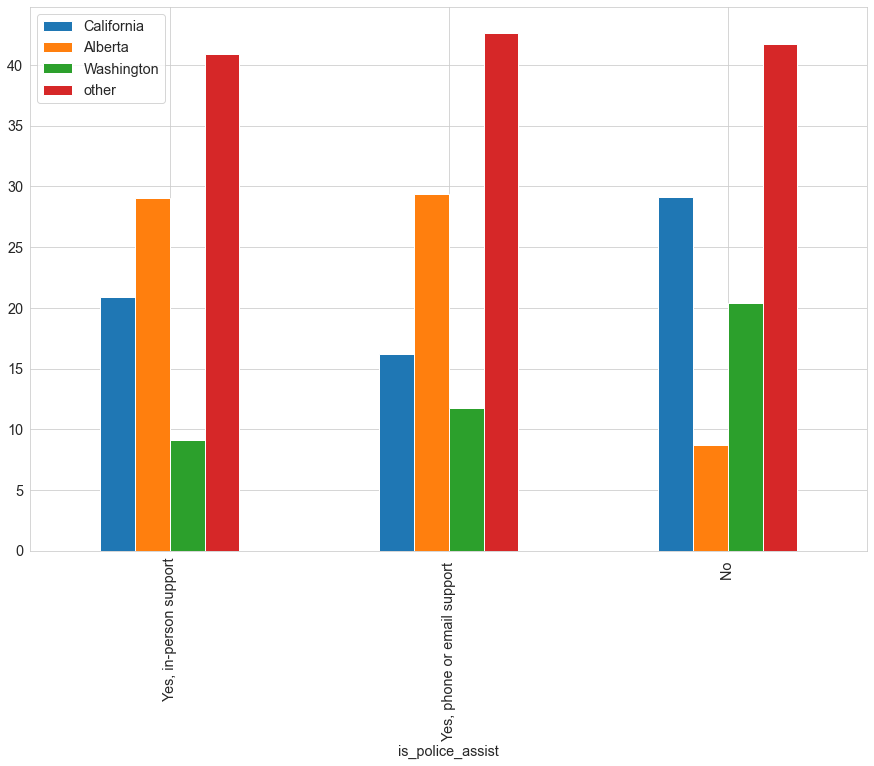

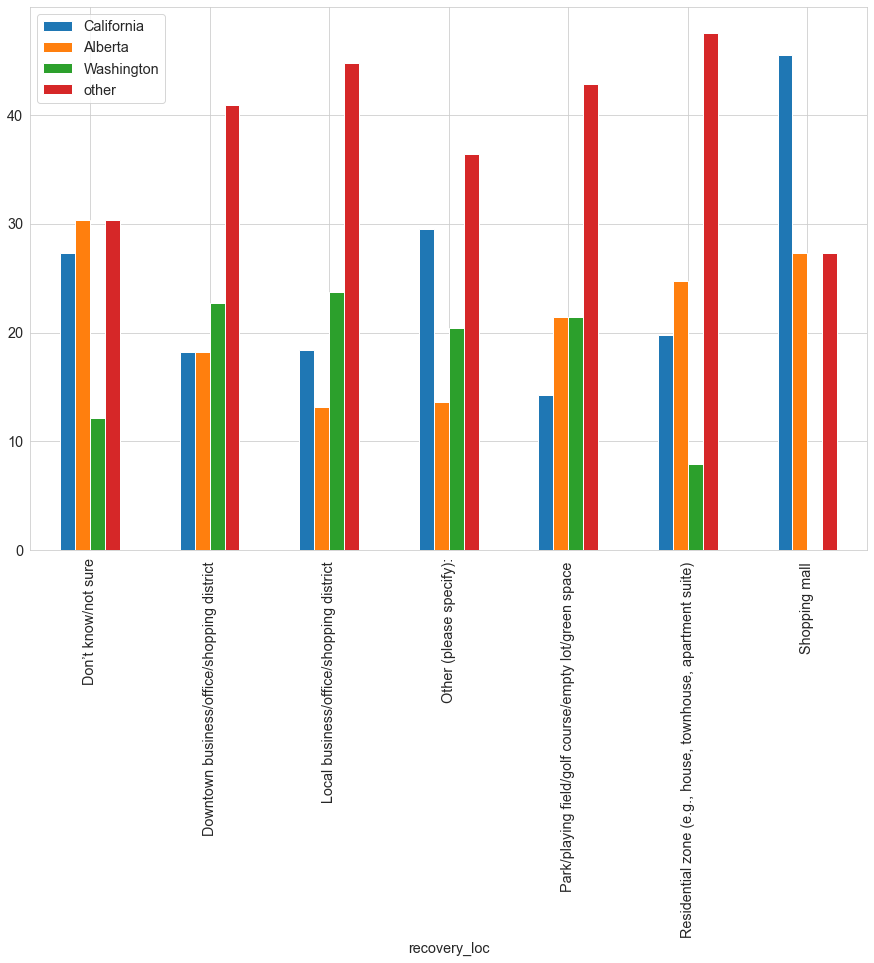

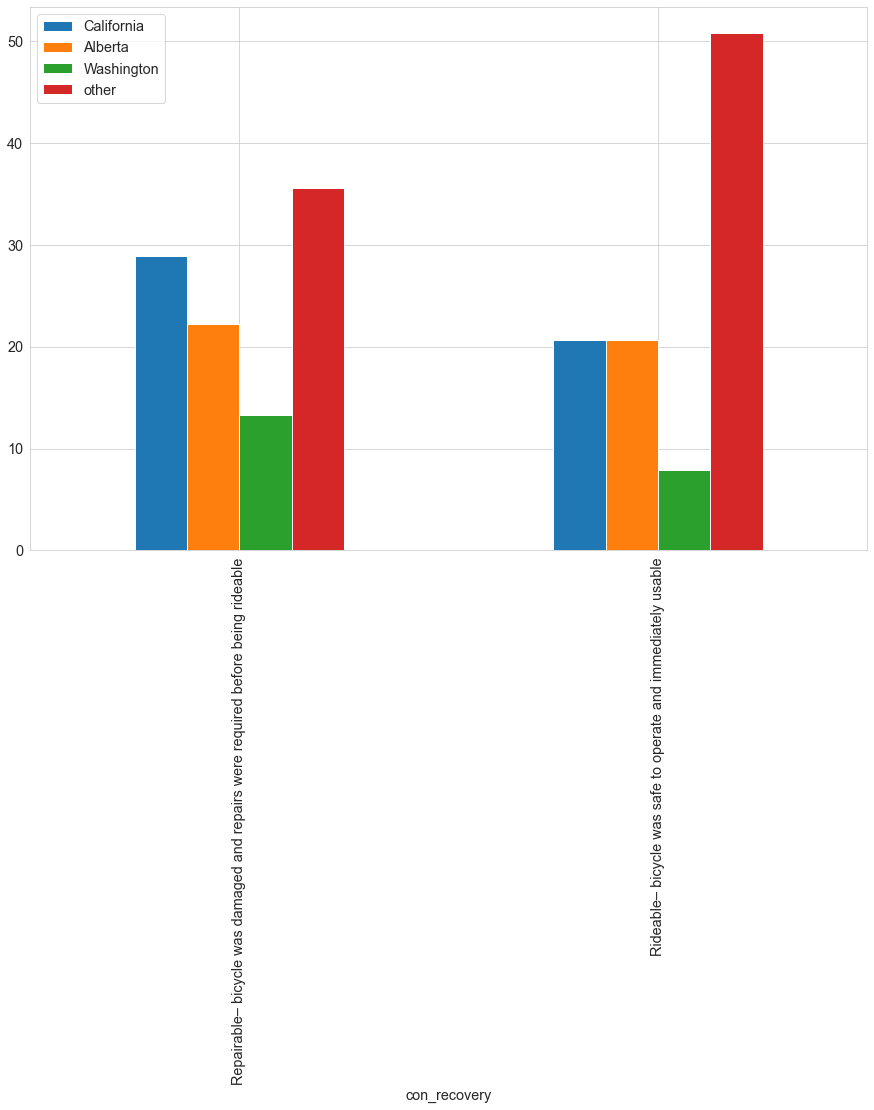

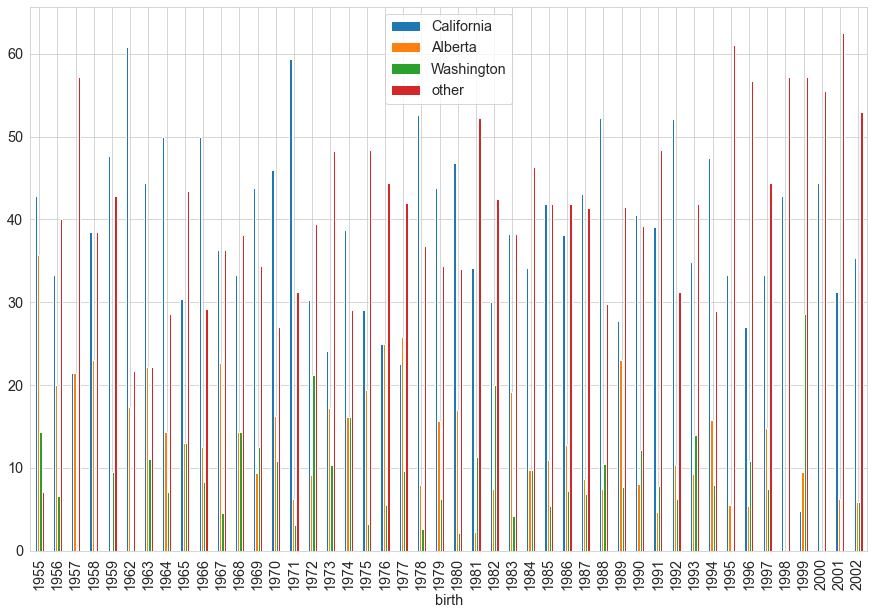

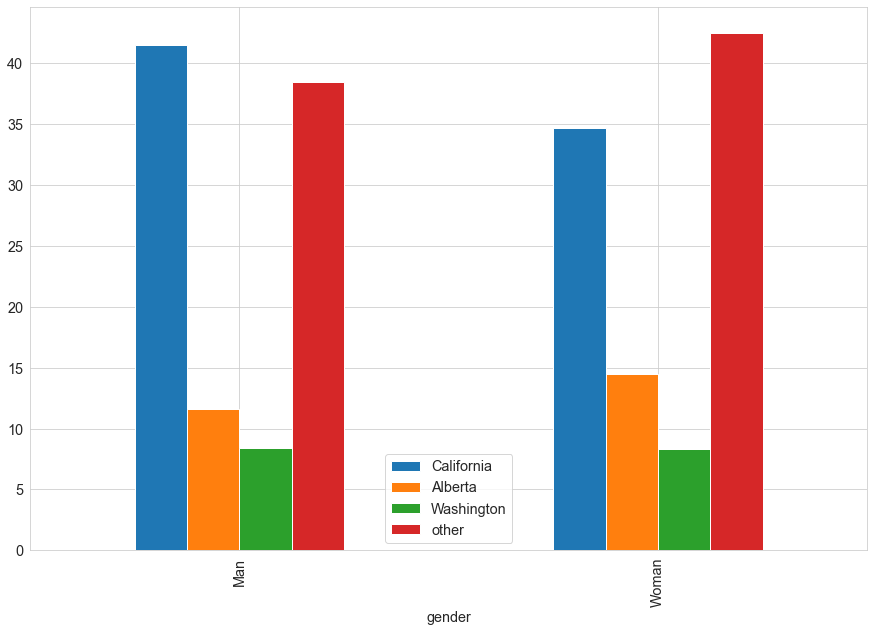

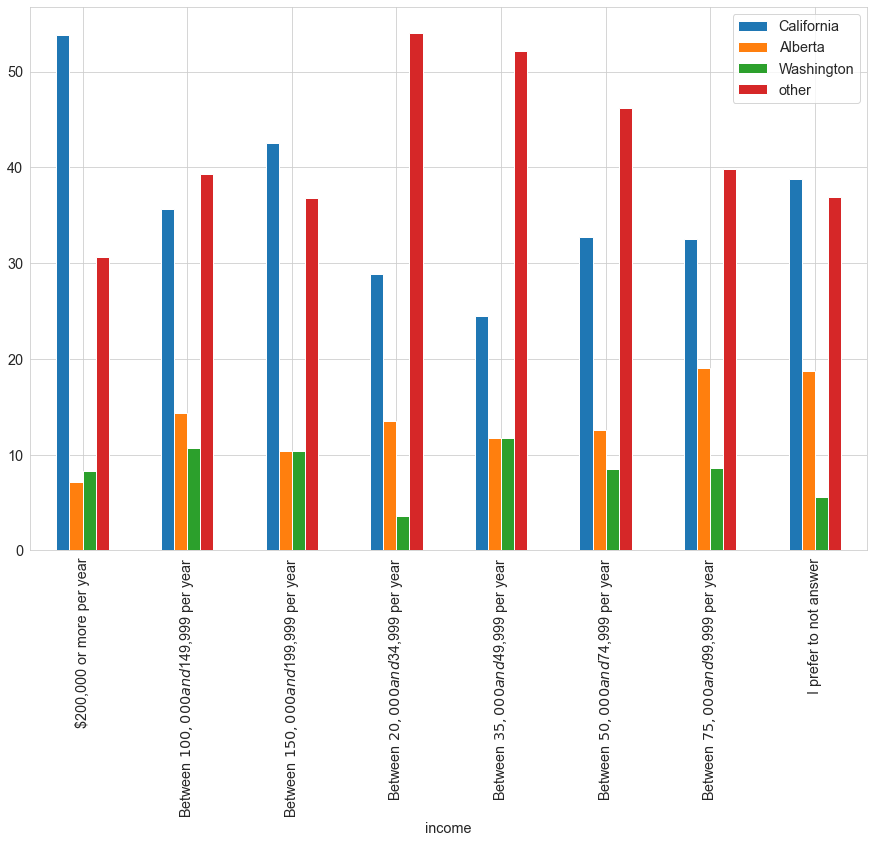

C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


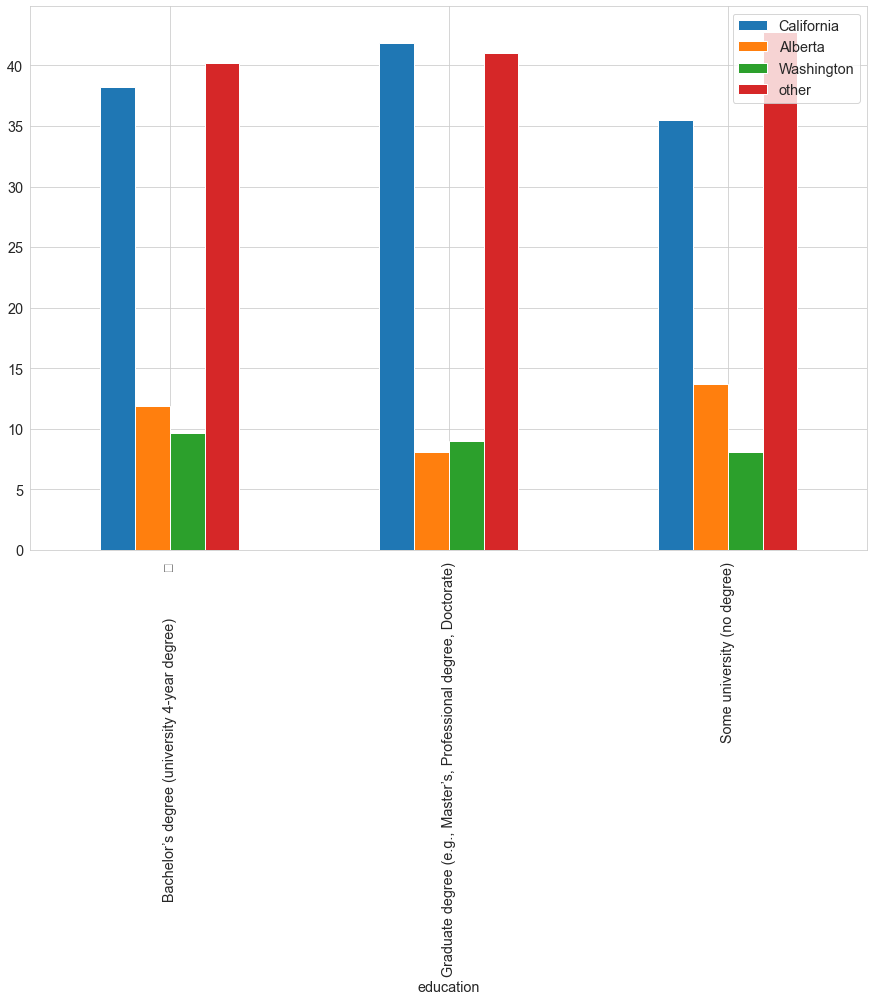

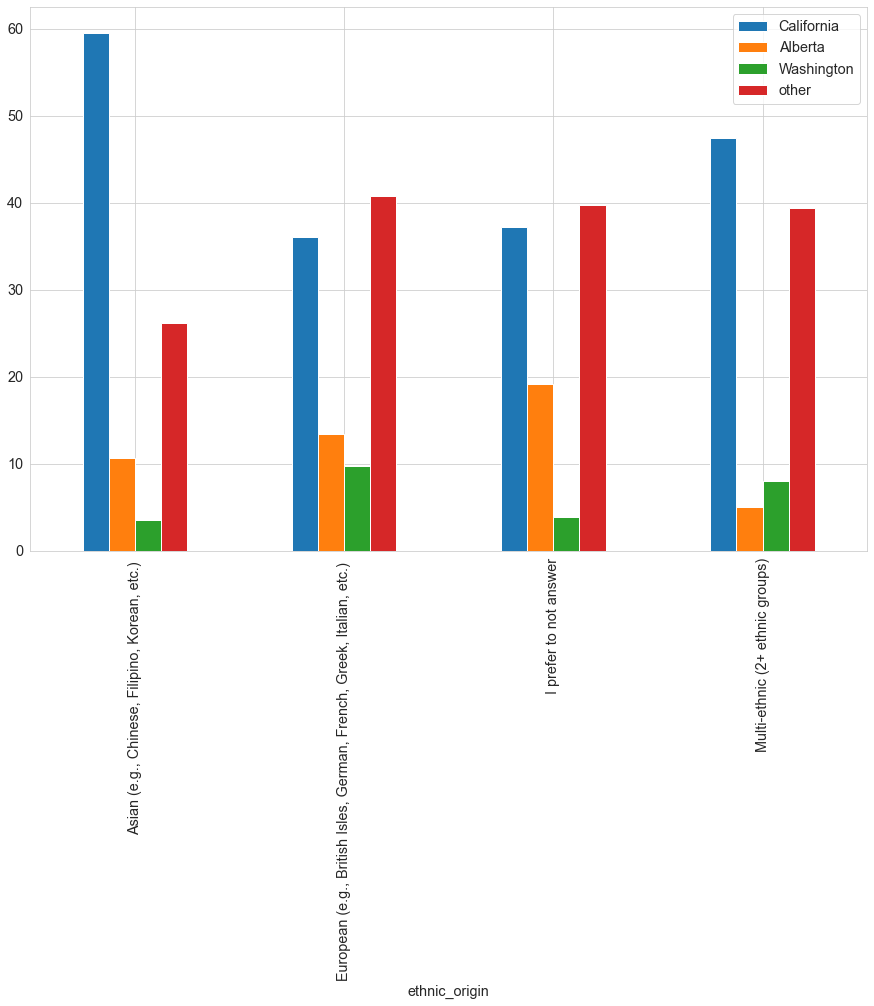

In [12]:
for df in data_store:
    q_name = df.index.name
    print(q_name)
    # Calculate state-based distributions for the possible answers to a given question
    # for the states/provinces in cols
    df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

    # for all the rest as one group
    df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
    df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100

    # Less popular answers  should be removed, which is relative to the number of possible answers
    temp_sum = df.Total.sum(axis=0)
    tolerance = temp_sum/(len(df)*2)
    rem_df = df[df['Total']<tolerance]
    print('those are not include in the results presentation since less than {} tolerance  {}'.format(tolerance,rem_df.index.values))
    new_df = df[df['Total']>tolerance]
    # Make a table to export with the real and relative (%) values on the same column
    df_table= DataFrame(columns=cols[1:])
    df_table[df_table.columns] = new_df.apply(lambda x: prep_for_export(x),axis=1)
    df_table.to_csv('python/notebooks/output/per_state/csv/'+q_name +'.csv')
    df_table

    # Plot the results and save them on the disk
    df_show= DataFrame(columns=cols[1:])
    df_show[cols[1:]] = new_df[per_cols_by_ans]
    df_show.plot.bar()
    plt.savefig('python/notebooks/output/per_state/figs/'+q_name+'.png')

    # Indicate when there is interesting results
    find_max= df_show.copy()
    # res save the index of the one with max absolute distance from the average
    res= (abs(find_max.mean() - find_max).idxmax())
    def is_intersting_def(temp_col):
        df_filter = temp_col.reset_index() # Move the question to a column
        outlier_place = df_filter.columns[-1]  # The state to examine
        outlier_att = res[outlier_place] # A possible outlier answer

        # The value for  the possible outlier answer
        is_intersting = df_filter[df_filter[q_name]==outlier_att]
        val_outlier = is_intersting[outlier_place]
        val_outlier
        # Determine the mean and standard deviation without taking into account suspicious outlier
        not_outlier = df_filter[df_filter[q_name]!=outlier_att][outlier_place]
        new_mean = not_outlier.mean()
        new_std = not_outlier.std()
        # Test to determine if it is an outlier and to find out if the results are interesting
        if (abs(val_outlier - new_mean) - new_std*2.5  > 0).any():
            print ('for {} ({}) : {} is outlier (new_mean:{}, new_std:{})'.format(outlier_place,round(val_outlier.values[0],2),outlier_att,round(new_mean,2),round(new_std,2)))
    res =find_max.apply(is_intersting_def)

In [16]:
new_df

,Total,per_Total,California,per_California,Alberta,per_Alberta,Washington,per_Washington,per_2_California,per_2_Alberta,per_2_Washington,other,per_2_other
year,,,,,,,,,,,,,
2019,262,16,82,13,32,18,37,28,31.297710,12.213740,14.122137,111,42.366412
2020,325,21,138,22,39,22,25,19,42.461538,12.000000,7.692308,123,37.846154
2021,695,44,268,44,69,38,55,42,38.561151,9.928058,7.913669,303,43.597122
2022,159,10,85,14,21,11,7,5,53.459119,13.207547,4.402516,46,28.930818


In [ ]:
# ## the next code is appliciable only for birth year
#
# df  = data_store[-5]
# df_b_year = df.reset_index()
# df_b_year['year_group']=''
# df_b_year.loc[df_b_year['birth']>1950]['year_group'] = 50
# df_b_year

In [11]:
df  = data_store[1]
df.index.name

'year'

In [ ]:
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100


In [172]:
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = new_df[per_cols_by_ans]

╒════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│   year │   Total │   California │   Alberta │   Washington │   other │
╞════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│   2019 │     262 │           82 │        32 │           37 │     111 │
├────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│   2020 │     325 │          138 │        39 │           25 │     123 │
├────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│   2021 │     695 │          268 │        69 │           55 │     303 │
├────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│   2022 │     159 │           85 │        21 │            7 │      46 │
╘════════╧═════════╧══════════════╧═══════════╧══════════════╧═════════╛
|   year |   California |   Alberta |   Washington |   other |
|-------:|-------------:|----------:|-------------:|--------:|
|   2019 |           31 |        12 |           14 |      42 |
|   2020

<AxesSubplot:xlabel='year'>

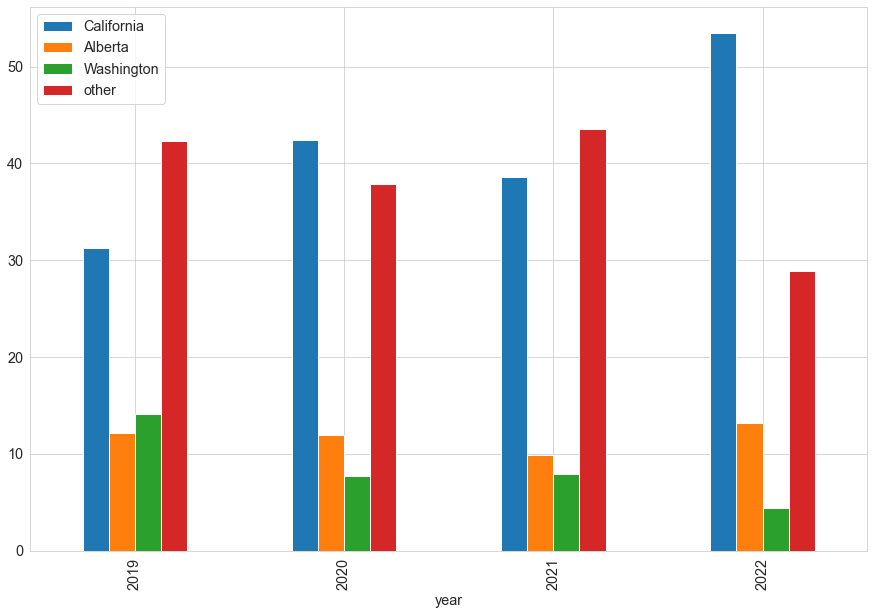

In [124]:

# print(tabulate(new_df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
# print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar()
plt.savefig('python/notebooks/per_state/'+df_table.index.name +'.png')


In [198]:
find_max= df_show.copy()
find_max
res= (abs(find_max.mean() - find_max).idxmax())
def is_intersting_def(temp_col):
    df_filter = temp_col.reset_index()
    outlier_place = df_filter.columns[-1]
    outlier_att = res[outlier_place]
    is_intersting = df_filter[df_filter['year']==outlier_att]
    new_mean = df_filter[df_filter['year']!=outlier_att][outlier_place].mean()
    new_std = df_filter[df_filter['year']!=outlier_att][outlier_place].std()
    if (abs(is_intersting[outlier_place] - new_mean) - new_std*2.5  > 0).any():
        print ('for {} : {} is outlier (new_mean:{}, new_std:{})'.format(outlier_place,outlier_att,round(new_mean,2),round(new_std,2)))
res =find_max.apply(is_intersting_def)

,California,Alberta,Washington,other
year,,,,
2019,31.297710,12.213740,14.122137,42.366412
2020,42.461538,12.000000,7.692308,37.846154
2021,38.561151,9.928058,7.913669,43.597122
2022,53.459119,13.207547,4.402516,28.930818


for California : 2022 is outlier (new_mean:37.44, new_std:5.67)
for Alberta : 2021 is outlier (new_mean:12.47, new_std:0.64)
for Washington : 2019 is outlier (new_mean:6.67, new_std:1.97)
for other : 2022 is outlier (new_mean:41.27, new_std:3.03)


╒═════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ year                │   Total │   California │   Alberta │   Washington │   other │
╞═════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ 2017                │      45 │           16 │         7 │            0 │      22 │
├─────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ 2018                │      54 │           12 │         9 │            5 │      28 │
├─────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ 2019                │     262 │           82 │        32 │           37 │     111 │
├─────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ 2020                │     325 │          138 │        39 │           25 │     123 │
├─────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ 2021                │     695 │          268 │      

<AxesSubplot:xlabel='year'>

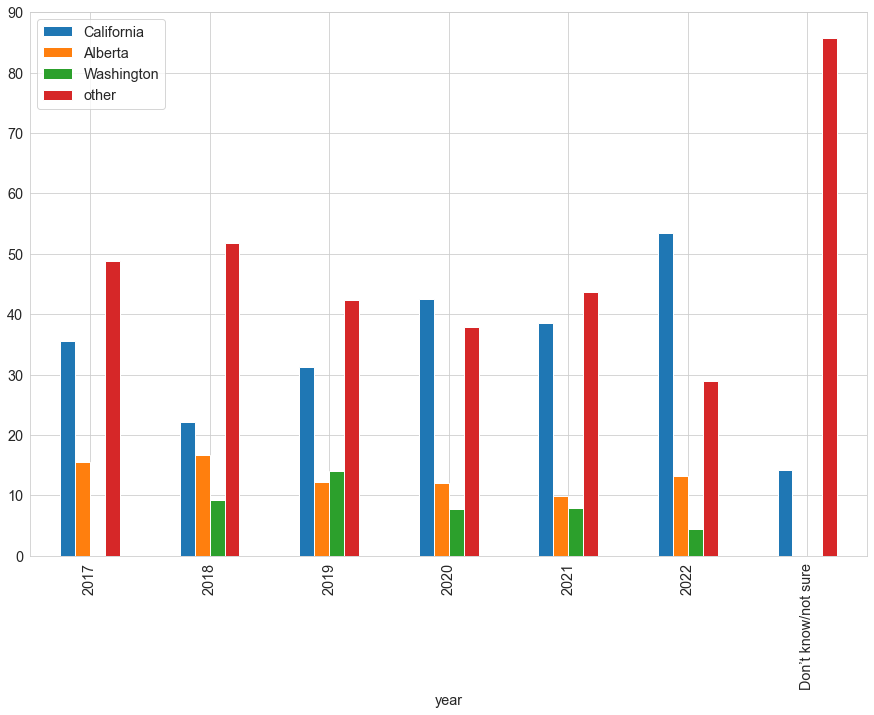

In [70]:
df  = data_store[1]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar()

╒═══════════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ gender                    │   Total │   California │   Alberta │   Washington │   other │
╞═══════════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ Man                       │    1060 │          440 │       123 │           89 │     408 │
├───────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Non-binary / third gender │      21 │            9 │         1 │            1 │      10 │
├───────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Prefer not to say         │      35 │           11 │         4 │            3 │      17 │
├───────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Woman                     │     614 │          213 │        89 │           51 │     261 │
╘═══════════════════════════╧═════════╧══════════════╧═══════════╧══════════════

<AxesSubplot:xlabel='gender'>

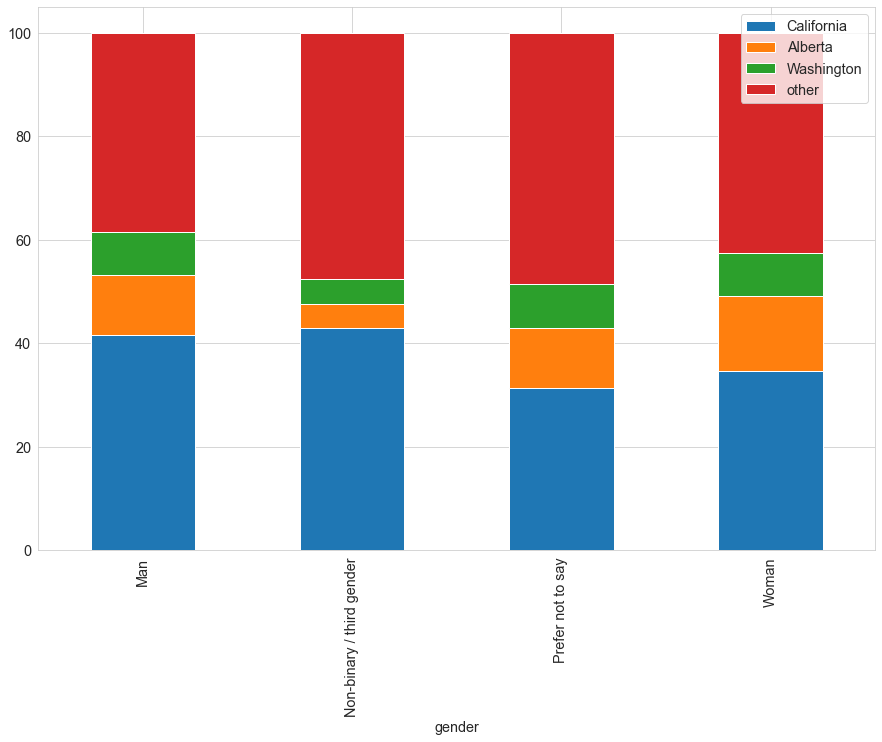

In [33]:
df  = data_store[2]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar(stacked=True)

╒════════════════════════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ income                                 │   Total │   California │   Alberta │   Washington │   other │
╞════════════════════════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ $200,000 or more per year              │     362 │          195 │        26 │           30 │     111 │
├────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Between $100,000 and $149,999 per year │     272 │           97 │        39 │           29 │     107 │
├────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Between $150,000 and $199,999 per year │     174 │           74 │        18 │           18 │      64 │
├────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Between $20,000 and $34,999 per year   │     111 │   

<AxesSubplot:xlabel='income'>

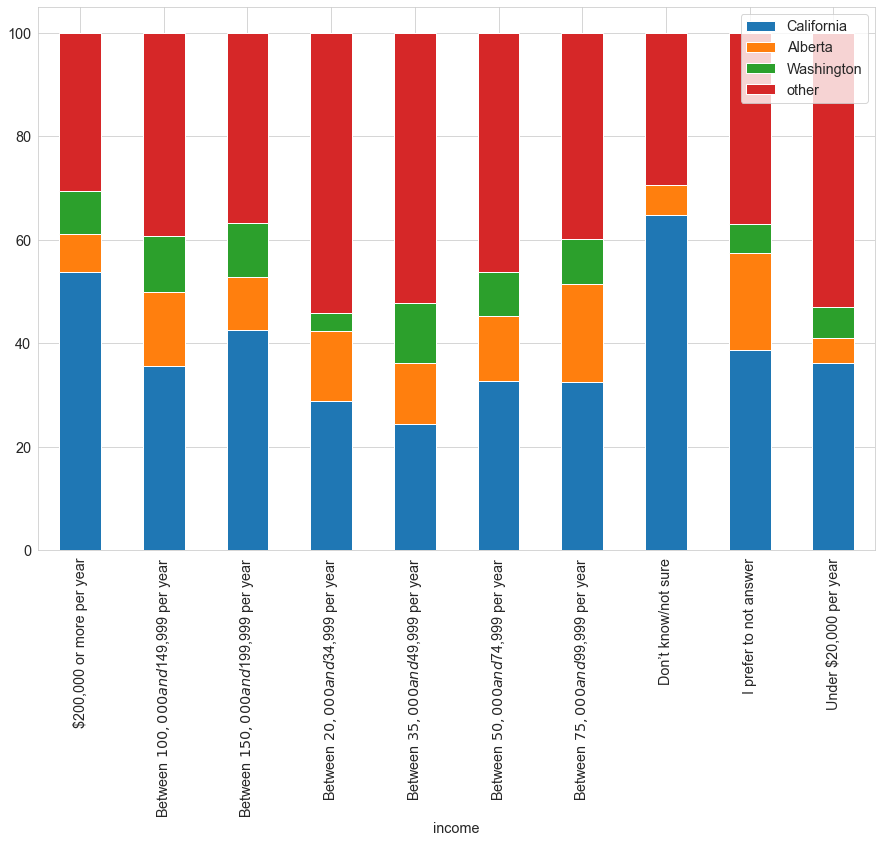

In [34]:
df  = data_store[3]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar(stacked=True)

╒═══════════════════════════════════════════════════════════════════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ education                                                                         │   Total │   California │   Alberta │   Washington │   other │
╞═══════════════════════════════════════════════════════════════════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ Associate’s/vocational/technical degree (2- or 3-year degree, trades certificate) │     110 │           27 │        38 │            3 │      42 │
├───────────────────────────────────────────────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Bachelor’s degree (university 4-year degree)                                      │     672 │          257 │        80 │           65 │     270 │
├───────────────────────────────────────────────────────────────────────────────────┼─────────┼──────────────┼──

<AxesSubplot:xlabel='education'>

C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


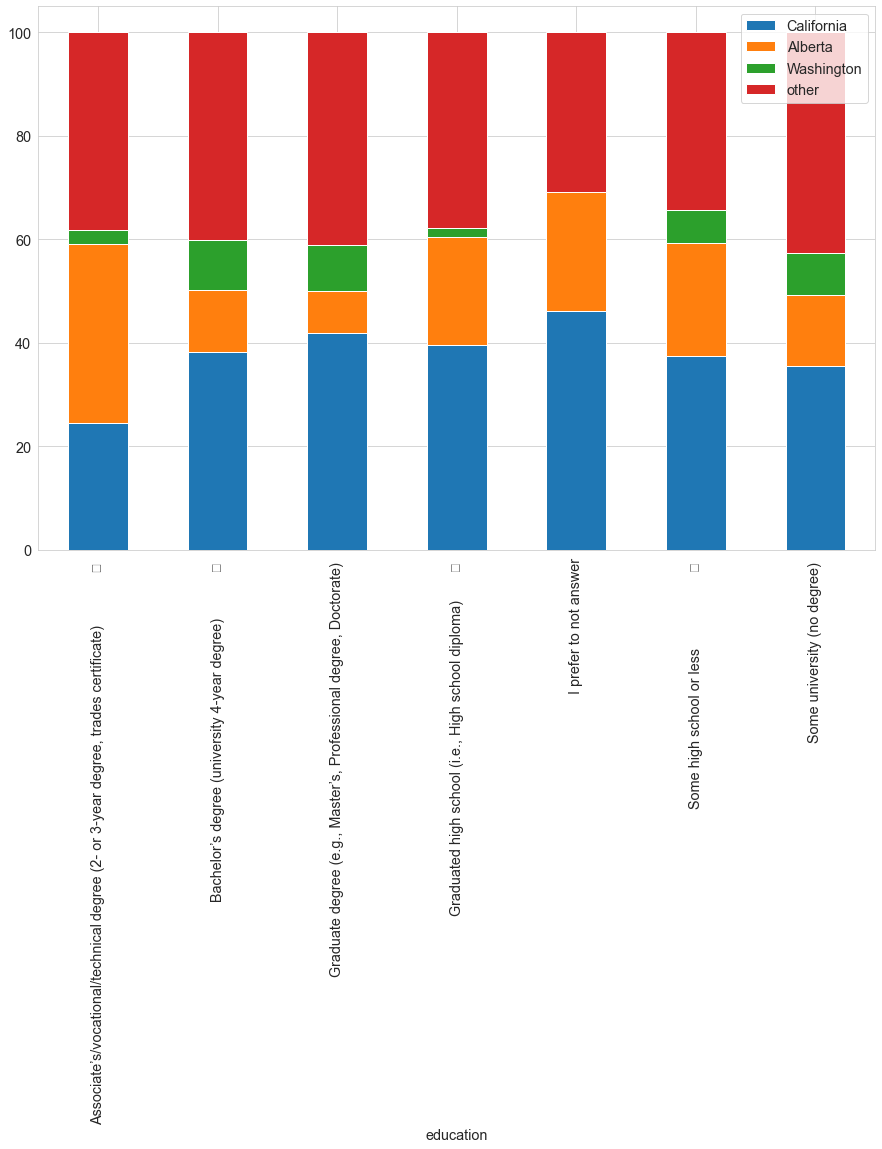

In [35]:

df  = data_store[4]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar(stacked=True)

╒════════════════════════════════════════════════════════════════════════╤═════════╤══════════════╤═══════════╤══════════════╤═════════╕
│ ethnic_origin                                                          │   Total │   California │   Alberta │   Washington │   other │
╞════════════════════════════════════════════════════════════════════════╪═════════╪══════════════╪═══════════╪══════════════╪═════════╡
│ African (e.g., Moroccan, Ghanaian, South African, etc.)                │      19 │           10 │         0 │            0 │       9 │
├────────────────────────────────────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Asian (e.g., Chinese, Filipino, Korean, etc.)                          │      84 │           50 │         9 │            3 │      22 │
├────────────────────────────────────────────────────────────────────────┼─────────┼──────────────┼───────────┼──────────────┼─────────┤
│ Caribbean (e.g., Cuban, Jamaican, Bajan

<AxesSubplot:xlabel='ethnic_origin'>

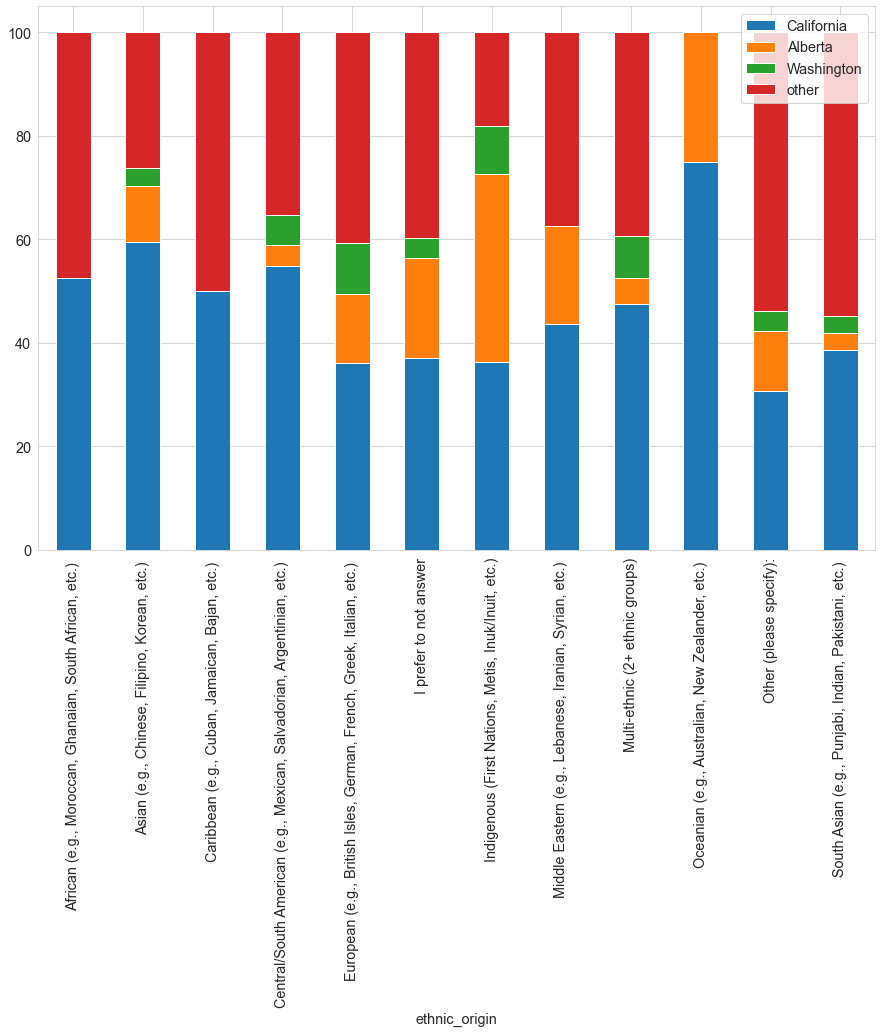

In [36]:
df  = data_store[5]
df[per_cols_by_ans[:-1]] = df[cols[1:-1]].div(df[cols[0]], axis=0)*100

df[cols[-1]] = df[cols[0]] - df[cols[1:-1]].sum(axis=1)
df[per_cols_by_ans[-1]] = df[cols[-1]]/df[cols[0]]*100
df_show= DataFrame(columns=cols[1:])
df_show[cols[1:]] = df[per_cols_by_ans]

print(tabulate(df[cols].astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(df_show.astype(int), headers = 'keys', tablefmt = 'pipe'))

df_show.plot.bar(stacked=True)